<a href="https://colab.research.google.com/github/Adhiperumbar/ML/blob/main/housingprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('AmesHousing.csv')

missing_data = df.isnull().sum()
print("Missing data per column:\n", missing_data)

df.dropna(axis=1, thresh=int(0.5*len(df)), inplace=True)

# Fill missing values in numeric columns with the median
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Fill missing values in categorical columns with the mode
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

df = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete!")
print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)


Saving AmesHousing.csv to AmesHousing (3).csv
Missing data per column:
 Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64
Data preprocessing complete!
Training data shape:  (2344, 248)
Testing data shape:  (586, 248)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("RMSE:", rmse)
print("R² Score:", r2)


Linear Regression Results:
RMSE: 0.3658398363624628
R² Score: 0.8935020974651887


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Results:")
print("RMSE:", rf_rmse)
print("R² Score:", rf_r2)


Random Forest Results:
RMSE: 0.33379297018585286
R² Score: 0.9113429169448662


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost Results:")
print("RMSE:", xgb_rmse)
print("R² Score:", xgb_r2)


XGBoost Results:
RMSE: 0.30517569098802055
R² Score: 0.9258930500123529


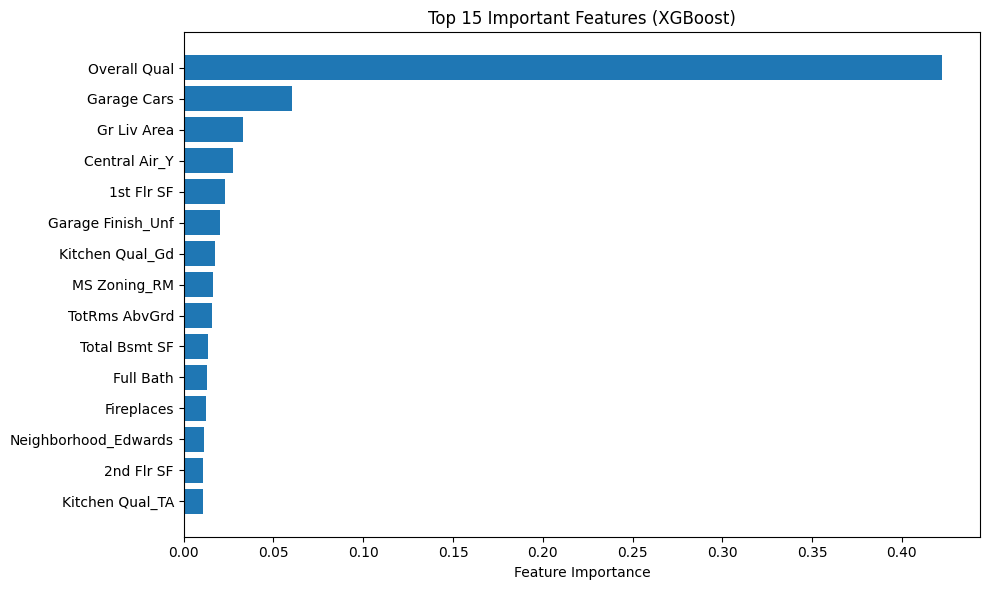

In [ ]:
import matplotlib.pyplot as plt

xgb_importance = xgb_model.feature_importances_
sorted_idx = xgb_importance.argsort()[-15:]  # top 15 important features

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], xgb_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features (XGBoost)")
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']